In [2341]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy import stats



In [2342]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2343]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [2344]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [2345]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [2346]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


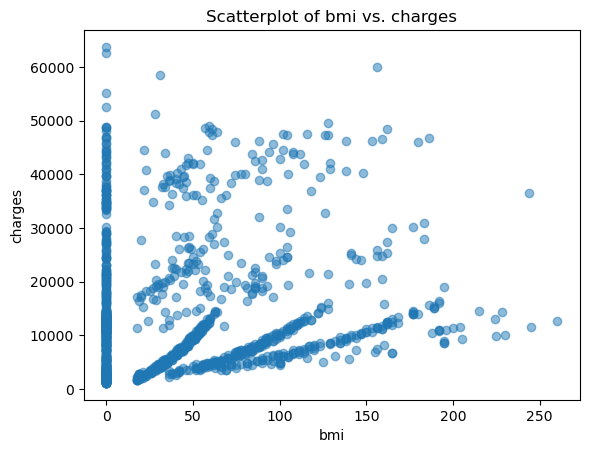

In [2347]:
plt.scatter(df['children']*df['age'], df['charges'], alpha=0.5)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title(f'Scatterplot of bmi vs. charges')
plt.show()

In [2348]:
contingency_table = pd.crosstab(df['smoker'], df['sex'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 7.39291081459996
P-value: 0.006548143503580696
Degrees of Freedom: 1
Expected Frequencies Table:
[[526.43348281 537.56651719]
 [135.56651719 138.43348281]]


In [2349]:
df['bmi_age']=df['bmi']*df['age']

In [2350]:
df['chil_age']=df['children']*df['age']

In [2351]:
unique_categories = df['children'].unique()
unique_categories

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [2352]:
unique_categories = df['region'].unique()
unique_categories

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [2353]:
#df =df.drop(['region','smoker'],axis=1).copy()

In [2354]:
#scaler = StandardScaler()
#df['charges'] = scaler.fit_transform(df[['charges']])


In [2355]:
df['bmi_transformed'] = np.log(df['bmi'])
df=df.drop(columns='bmi',axis=1).copy()
df.head()

,age,sex,children,smoker,region,charges,bmi_age,chil_age,bmi_transformed
0,19,female,0,yes,southwest,16884.92400,530.100,0,3.328627
1,18,male,1,no,southeast,1725.55230,607.860,18,3.519573
2,28,male,3,no,southeast,4449.46200,924.000,84,3.496508
3,33,male,0,no,northwest,21984.47061,749.265,0,3.122585
4,32,male,0,no,northwest,3866.85520,924.160,0,3.363149


In [2356]:
df.describe(include='all')

,age,sex,children,smoker,region,charges,bmi_age,chil_age,bmi_transformed
count,1338.000000,1338,1338.000000,1338,1338,1338.000000,1338.000000,1338.000000,1338.000000
unique,NaN,2,NaN,2,4,NaN,NaN,NaN,NaN
top,NaN,male,NaN,no,southeast,NaN,NaN,NaN,NaN
freq,NaN,676,NaN,1064,364,NaN,NaN,NaN,NaN
mean,39.207025,NaN,1.094918,NaN,NaN,13270.422265,1211.575919,43.647235,3.402946
std,14.049960,NaN,1.205493,NaN,NaN,12110.011237,522.608731,51.559607,0.202492
min,18.000000,NaN,0.000000,NaN,NaN,1121.873900,287.280000,0.000000,2.770086
25%,27.000000,NaN,0.000000,NaN,NaN,4740.287150,765.625000,0.000000,3.269426
50%,39.000000,NaN,1.000000,NaN,NaN,9382.033000,1152.225000,32.000000,3.414443
75%,51.000000,NaN,2.000000,NaN,NaN,16639.912515,1589.085000,72.000000,3.546560


In [2357]:
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
scaler = StandardScaler()
df['bmi_age'] = scaler.fit_transform(df[['bmi_age']])
scaler = StandardScaler()
df['chil_age'] = scaler.fit_transform(df[['chil_age']])
df.head()

,age,sex,children,smoker,region,charges,bmi_age,chil_age,bmi_transformed
0,-1.438764,female,0,yes,southwest,16884.92400,-1.304476,-0.846856,3.328627
1,-1.509965,male,1,no,southeast,1725.55230,-1.155629,-0.497615,3.519573
2,-0.797954,male,3,no,southeast,4449.46200,-0.550476,0.782936,3.496508
3,-0.441948,male,0,no,northwest,21984.47061,-0.884952,-0.846856,3.122585
4,-0.513149,male,0,no,northwest,3866.85520,-0.550170,-0.846856,3.363149


In [2358]:
df_en= pd.get_dummies(df,columns=['sex','region','smoker'])
df_en.head()

,age,children,charges,bmi_age,chil_age,bmi_transformed,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,-1.438764,0,16884.92400,-1.304476,-0.846856,3.328627,1,0,0,0,0,1,0,1
1,-1.509965,1,1725.55230,-1.155629,-0.497615,3.519573,0,1,0,0,1,0,1,0
2,-0.797954,3,4449.46200,-0.550476,0.782936,3.496508,0,1,0,0,1,0,1,0
3,-0.441948,0,21984.47061,-0.884952,-0.846856,3.122585,0,1,0,1,0,0,1,0
4,-0.513149,0,3866.85520,-0.550170,-0.846856,3.363149,0,1,0,1,0,0,1,0


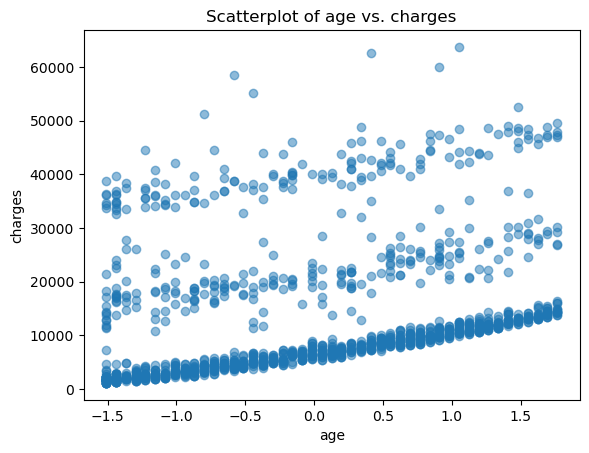

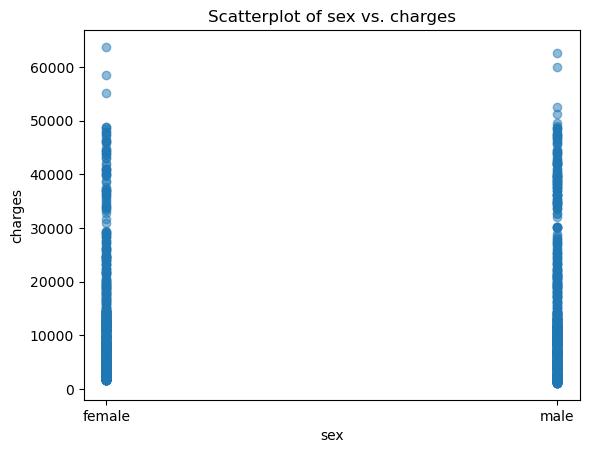

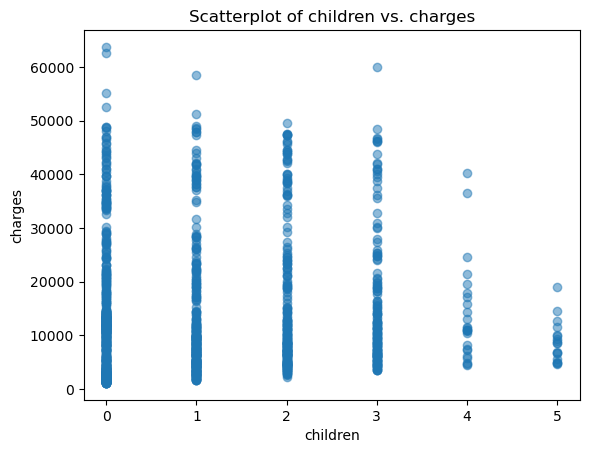

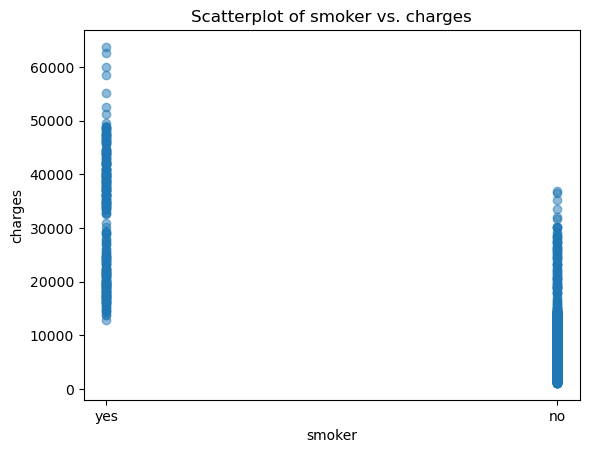

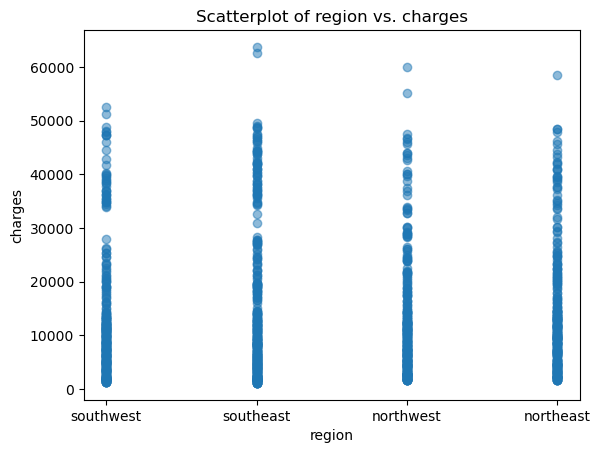

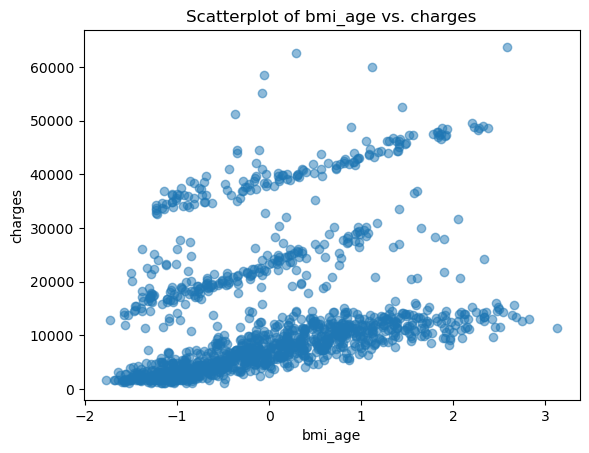

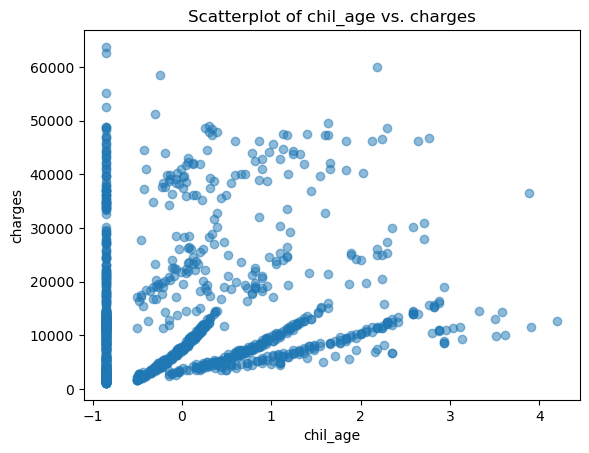

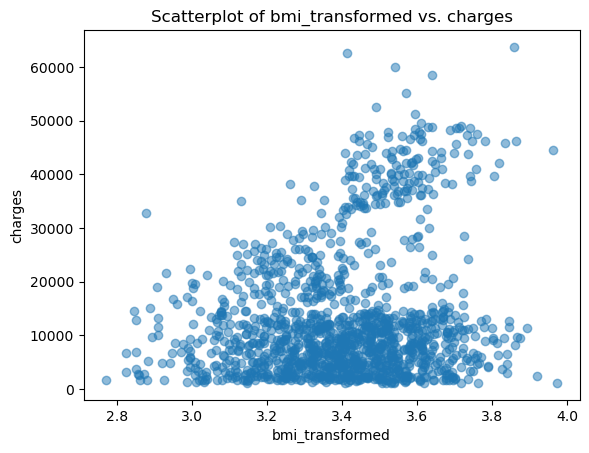

In [2359]:
for col in df.columns:
    if col != 'charges':
        plt.scatter(df[col], df['charges'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('charges')
        plt.title(f'Scatterplot of {col} vs. charges')
        plt.show()

In [2360]:
df_en.describe(include='all')

,age,children,charges,bmi_age,chil_age,bmi_transformed,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
count,1.338000e+03,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.853691e-16,1.094918,13270.422265,-1.311026e-17,-1.974836e-17,3.402946,0.494768,0.505232,0.242152,0.242900,0.272048,0.242900,0.795217,0.204783
std,1.000374e+00,1.205493,12110.011237,1.000374e+00,1.000374e+00,0.202492,0.500160,0.500160,0.428546,0.428995,0.445181,0.428995,0.403694,0.403694
min,-1.509965e+00,0.000000,1121.873900,-1.769281e+00,-8.468558e-01,2.770086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.691547e-01,0.000000,4740.287150,-8.536361e-01,-8.468558e-01,3.269426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.474046e-02,1.000000,9382.033000,-1.136091e-01,-2.259829e-01,3.414443,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.396738e-01,2.000000,16639.912515,7.226252e-01,5.501083e-01,3.546560,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.765289e+00,5.000000,63770.428010,3.127608e+00,4.197737e+00,3.972742,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2361]:
X =df_en.drop(columns=['charges','smoker_no','sex_female','region_southeast','bmi_transformed','chil_age'],axis=1) #','bmi_age','bmi_transformed','region_northwest','sex_male','smoker_yes'
#X = sm.add_constant(X)  # Add a constant term (intercept)
Y = df_en['charges']

In [2362]:
X.head()

,age,children,bmi_age,sex_male,region_northeast,region_northwest,region_southwest,smoker_yes
0,-1.438764,0,-1.304476,0,0,0,1,1
1,-1.509965,1,-1.155629,1,0,0,0,0
2,-0.797954,3,-0.550476,1,0,0,0,0
3,-0.441948,0,-0.884952,1,0,1,0,0
4,-0.513149,0,-0.550170,1,0,1,0,0


In [2363]:
Y_log =np.sqrt(Y)

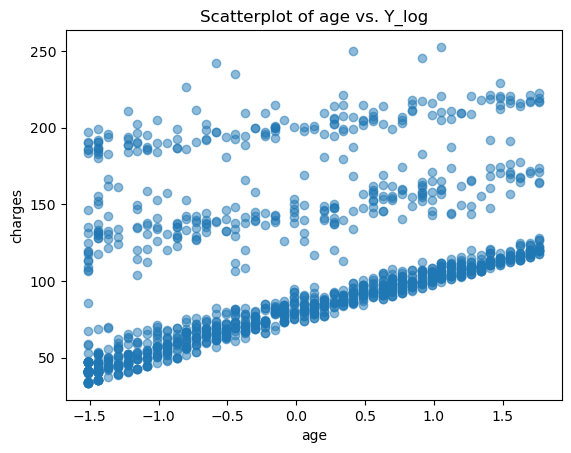

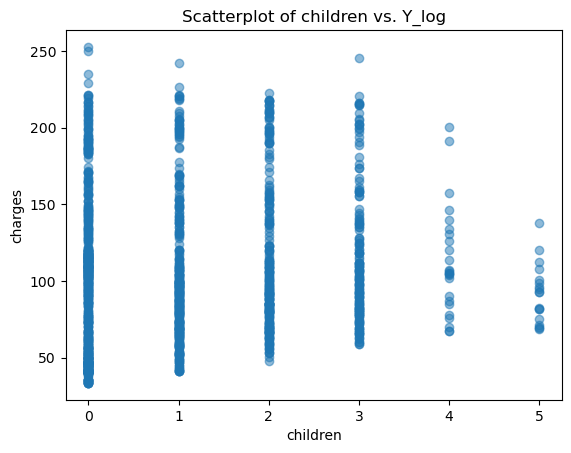

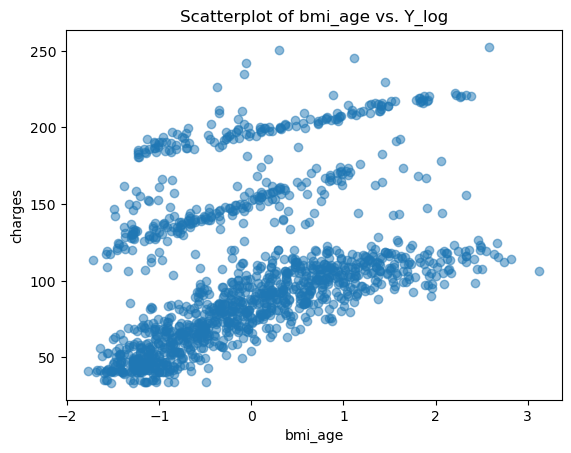

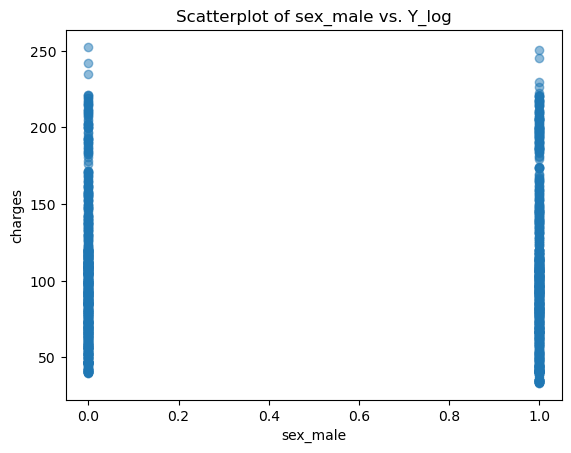

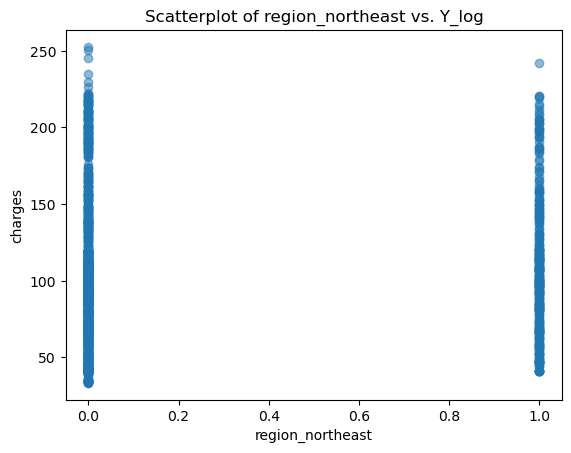

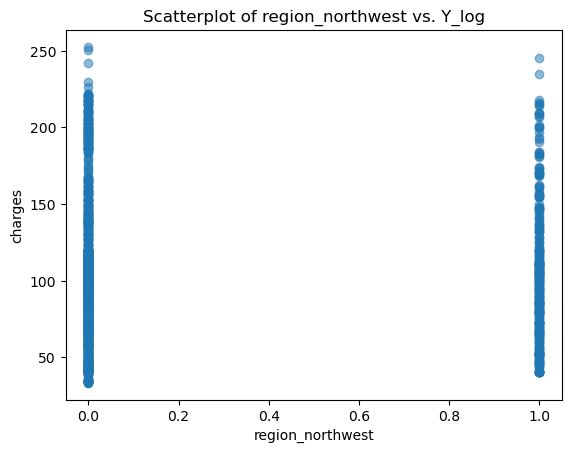

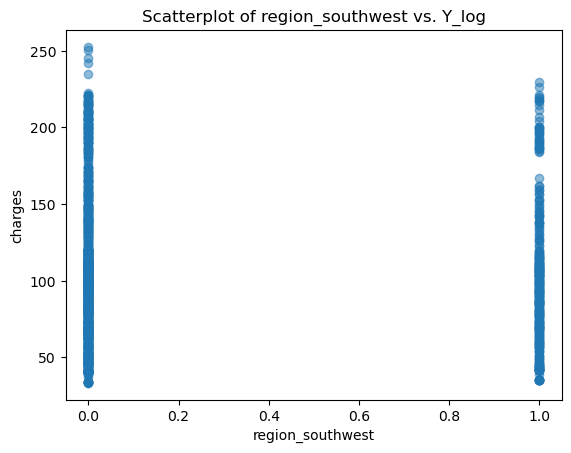

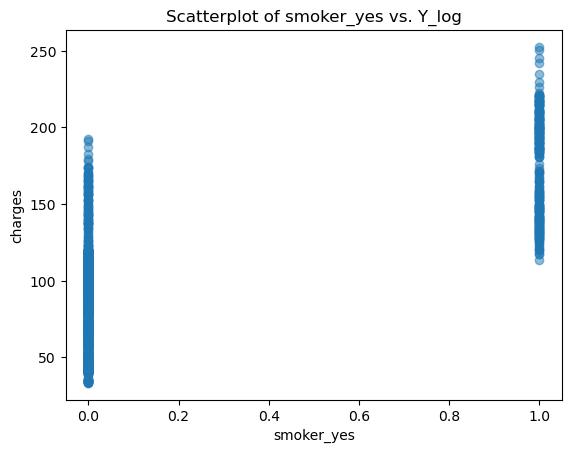

In [2364]:
for col in X.columns:
    
        plt.scatter(X[col], Y_log, alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('charges')
        plt.title(f'Scatterplot of {col} vs. Y_log')
        plt.show()

In [2365]:
#Y_log, lambda_value = stats.boxcox(Y)
#print("Optimal Lambda Value:", lambda_value)

In [2366]:
Y_log.describe(include='all')

count    1338.000000
mean      104.833605
std        47.770734
min        33.494386
25%        68.849739
50%        96.860893
75%       128.995729
max       252.528074
Name: charges, dtype: float64

In [2367]:
model = sm.OLS(Y_log,X).fit()

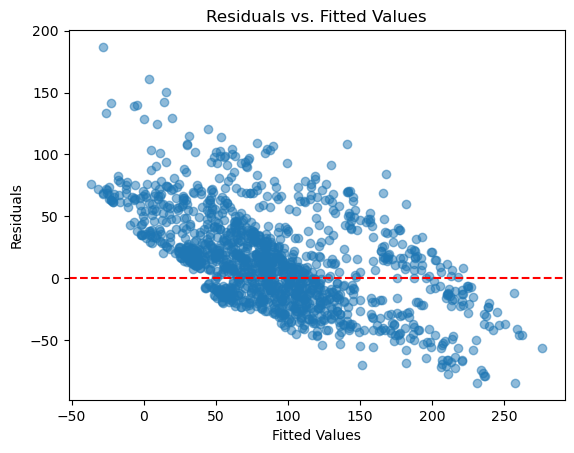

In [2368]:
# Plot residuals vs. fitted values
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

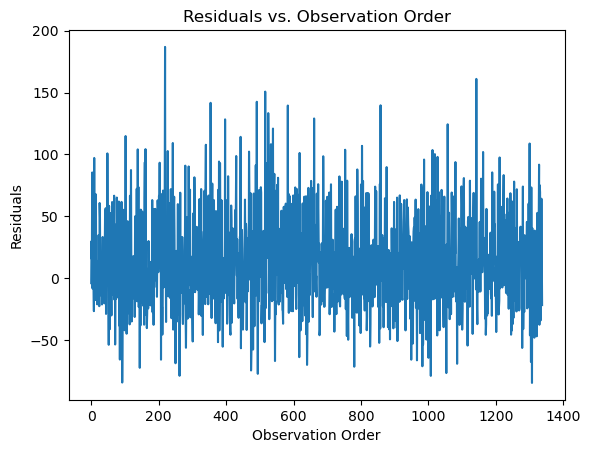

In [2369]:
plt.plot(residuals)
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residuals vs. Observation Order')
plt.show()

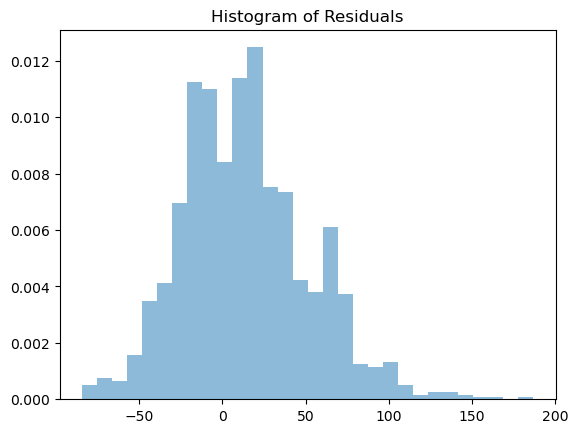

In [2370]:
# Assumption 4: Normality of Residuals

# Plot a histogram of residuals and a normal Q-Q plot
plt.hist(residuals, bins=30, density=True, alpha=0.5)
plt.title('Histogram of Residuals')
plt.show()


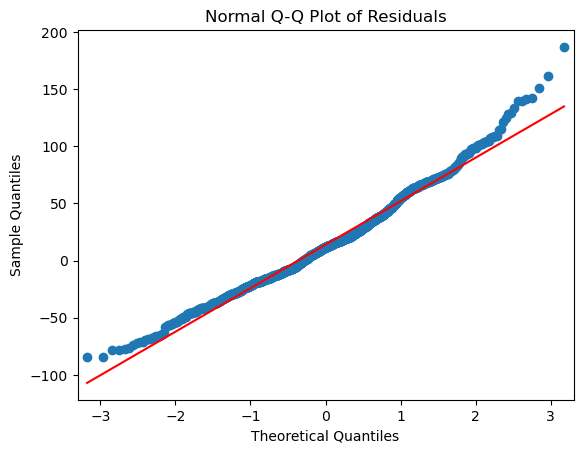

In [2371]:
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [2372]:
# Assumption 5: No Multicollinearity

# Calculate the Variance Inflation Factor (VIF) for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF:")
print(vif)

VIF:
           Variable       VIF
0               age  4.615289
1          children  1.612376
2           bmi_age  4.662874
3          sex_male  1.720802
4  region_northeast  1.336585
5  region_northwest  1.354581
6  region_southwest  1.319419
7        smoker_yes  1.209124


In [2373]:
from scipy import stats

# Assuming you have already fitted a linear regression model and obtained residuals
# For example, assuming 'residuals' contains the residuals from your model

# Perform the Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)

# Set the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if shapiro_p_value < alpha:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals appear to be normally distributed.")

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"P-value: {shapiro_p_value}")


Reject the null hypothesis: Residuals are not normally distributed.
Shapiro-Wilk Test Statistic: 0.9843118786811829
P-value: 7.415806857480334e-11


In [2374]:
coefficients = model.params
print("Estimated Coefficients:")
print(coefficients)

Estimated Coefficients:
age                   0.175007
children             12.972981
bmi_age              22.557734
sex_male             24.839430
region_northeast     60.371272
region_northwest     57.976423
region_southwest     53.731068
smoker_yes          109.738466
dtype: float64


In [2375]:
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              1178.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):                        0.00
Time:                        22:42:10   Log-Likelihood:                         -6851.3
No. Observations:                1338   AIC:                                  1.372e+04
Df Residuals:                    1330   BIC:                                  1.376e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [2376]:
np.var(residuals)

1449.2702814367483

In [2377]:
residuals.describe(include = True)

count    1338.000000
mean       13.854204
std        38.083517
min       -84.360821
25%       -12.920555
50%        11.577979
75%        36.608168
max       186.824500
dtype: float64

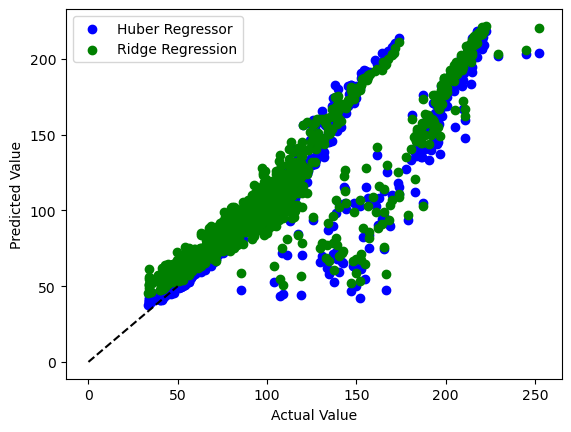

Mean Squared Error - Huber Regressor: 518.74
Mean Squared Error - Ridge Regression: 497.61


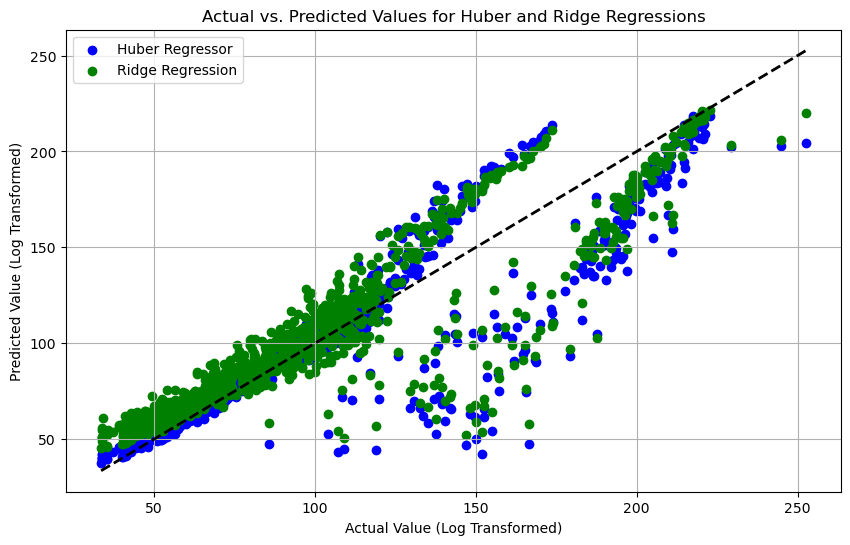

In [2422]:
import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_log, test_size=0.7, random_state=42)
huber_regressor = HuberRegressor(epsilon=1.8)
huber_regressor.fit(X_train, y_train)

# Fit a Ridge Regression to the training data
ridge_regressor = Ridge(alpha=0.01)
ridge_regressor.fit(X_train, y_train)
  
# Make predictions on the test data
y_pred_huber = huber_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)
  
plt.scatter(y_test, y_pred_huber, color='blue', label='Huber Regressor')
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot([0, 50], [0, 50], 'k--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

# Calculate the mean squared error
mse_huber = mean_squared_error(y_test, y_pred_huber)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
  
# Print the mean squared error
print("Mean Squared Error - Huber Regressor: {:.2f}".format(mse_huber))
print("Mean Squared Error - Ridge Regression: {:.2f}".format(mse_ridge))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_huber, color='blue', label='Huber Regressor')
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Value (Log Transformed)')
plt.ylabel('Predicted Value (Log Transformed)')
plt.legend()
plt.title('Actual vs. Predicted Values for Huber and Ridge Regressions')
plt.grid(True)
plt.show()

In [2423]:
r_squared = r2_score(y_test, y_pred_huber)
print("R-squared (R2):", r_squared)
r_squared = r2_score(y_test, y_pred_ridge)
print("R-squared (R2):", r_squared)
# Print the Huber regression coefficients (weights)
print("Huber Regression Coefficients:")
print(huber_model.coef_)

R-squared (R2): 0.7741684989791099
R-squared (R2): 0.7833683307308675
Huber Regression Coefficients:
[ 3.06767657e+03  3.66914984e+03  3.86885345e+02  2.42807237e-01
 -4.55356108e+02  7.09495531e+02  7.76757730e+02  5.99946599e+02
  2.57764528e+04]


In [2385]:
Y.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [2162]:
import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and fit the HuberRegressor model with hyperparameters
alpha = 0.00001  # Regularization strength (change as needed)
epsilon = 1.5 # Huber loss parameter (change as needed)greater than 1
max_iter = 1000 # Maximum number of iterations (change as needed)
huber_model = HuberRegressor(epsilon=epsilon, max_iter=max_iter)
huber_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = huber_model.predict(X)

# Calculate and print the model's performance metrics
mse = mean_squared_error(Y, y_pred)
rmse = mse**0.5
r_squared = r2_score(Y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)

# Print the Huber regression coefficients (weights)
print("Huber Regression Coefficients:")
print(huber_model.coef_)

Mean Squared Error (MSE): 47224826.640794046
Root Mean Squared Error (RMSE): 6872.032206035857
R-squared (R2): 0.6777403090525571
Huber Regression Coefficients:
[ 2.68725360e+03  3.22859693e+03  4.34739300e+02  1.17431999e+00
 -3.56013266e+02  3.54526219e+02  6.53393285e+01 -2.77132894e+02
  3.07307333e+04]


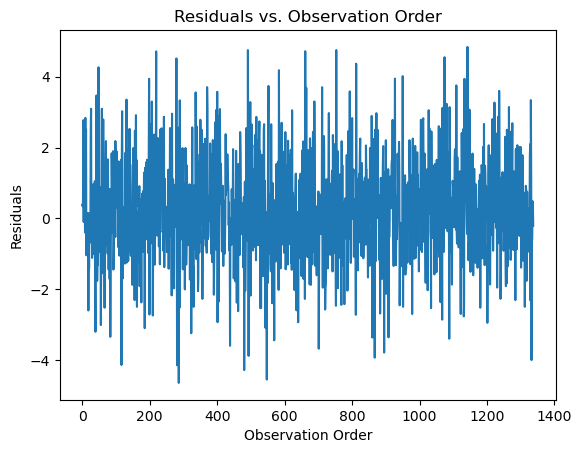

In [1754]:
plt.plot(residuals)
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residuals vs. Observation Order')
plt.show()

In [1755]:
X.head()

,age,children,bmi_age,sex_male,region_northeast,region_northwest,region_southwest,smoker_yes
0,-1.438764,0,530.100,0,0,0,1,1
1,-1.509965,1,607.860,1,0,0,0,0
2,-0.797954,3,924.000,1,0,0,0,0
3,-0.441948,0,749.265,1,0,1,0,0
4,-0.513149,0,924.160,1,0,1,0,0


In [1756]:
X = sm.add_constant(X)

# Fit Tukey's biweight regression model
tukey_model = sm.RLM(Y, X, M=sm.robust.norms.TukeyBiweight())
tukey_results = tukey_model.fit()

# Print regression summary
print(tukey_results.summary())







                    Robust linear Model Regression Results                    
Dep. Variable:                charges   No. Observations:                 1338
Model:                            RLM   Df Residuals:                     1329
Method:                          IRLS   Df Model:                            8
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 08 Sep 2023                                         
Time:                        21:15:18                                         
No. Iterations:                    31                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6089.3017    117.348  